In [29]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Heart Attack Prediction/heart_attack_prediction_indonesia.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df.head(5)

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,Never,NaN,High,Unhealthy,Moderate,Moderate,5.970603,113,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,Past,NaN,Moderate,Healthy,High,High,5.643813,132,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,Past,Moderate,Moderate,Healthy,Low,Low,6.336197,116,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,Never,Moderate,Moderate,Unhealthy,Low,High,7.912990,136,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,Current,Moderate,Moderate,Unhealthy,High,Moderate,3.252338,127,75,104,59,127,139,Normal,1,0,1,1


EDA

In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (158355, 28)


In [5]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease  

In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 age   hypertension       diabetes  cholesterol_level        obesity  waist_circumference  family_history    sleep_hours  blood_pressure_systolic  blood_pressure_diastolic  fasting_blood_sugar  cholesterol_hdl  cholesterol_ldl  triglycerides  previous_heart_disease  medication_usage  participated_in_free_screening   heart_attack
count  158355.000000  158355.000000  158355.000000      158355.000000  158355.000000        158355.000000   158355.000000  158355.000000            158355.000000             158355.000000        158355.000000    158355.000000    158355.000000  158355.000000           158355.000000     158355.000000                   158355.000000  158355.000000
mean       54.543778       0.299069       0.199804         199.533264       0.249901            93.268504        0.300218       6.480064               129.515772                 79.490809           110.736762        49.491478       129.569916     149.715885                0.200575    

In [7]:
print("\nData types:")
print(df.dtypes)


Data types:
age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results          

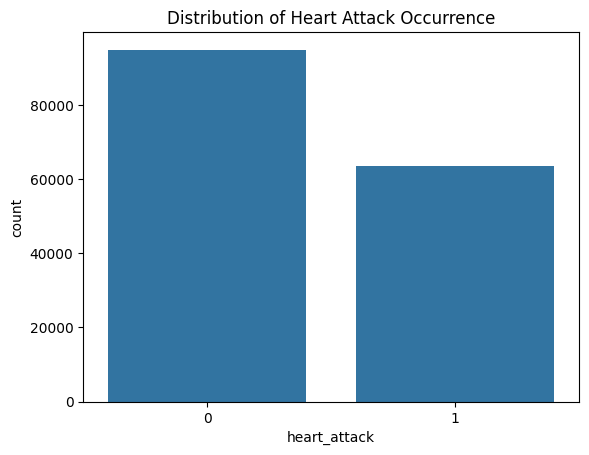

In [8]:
sns.countplot(x='heart_attack', data=df)
plt.title('Distribution of Heart Attack Occurrence')
plt.show()

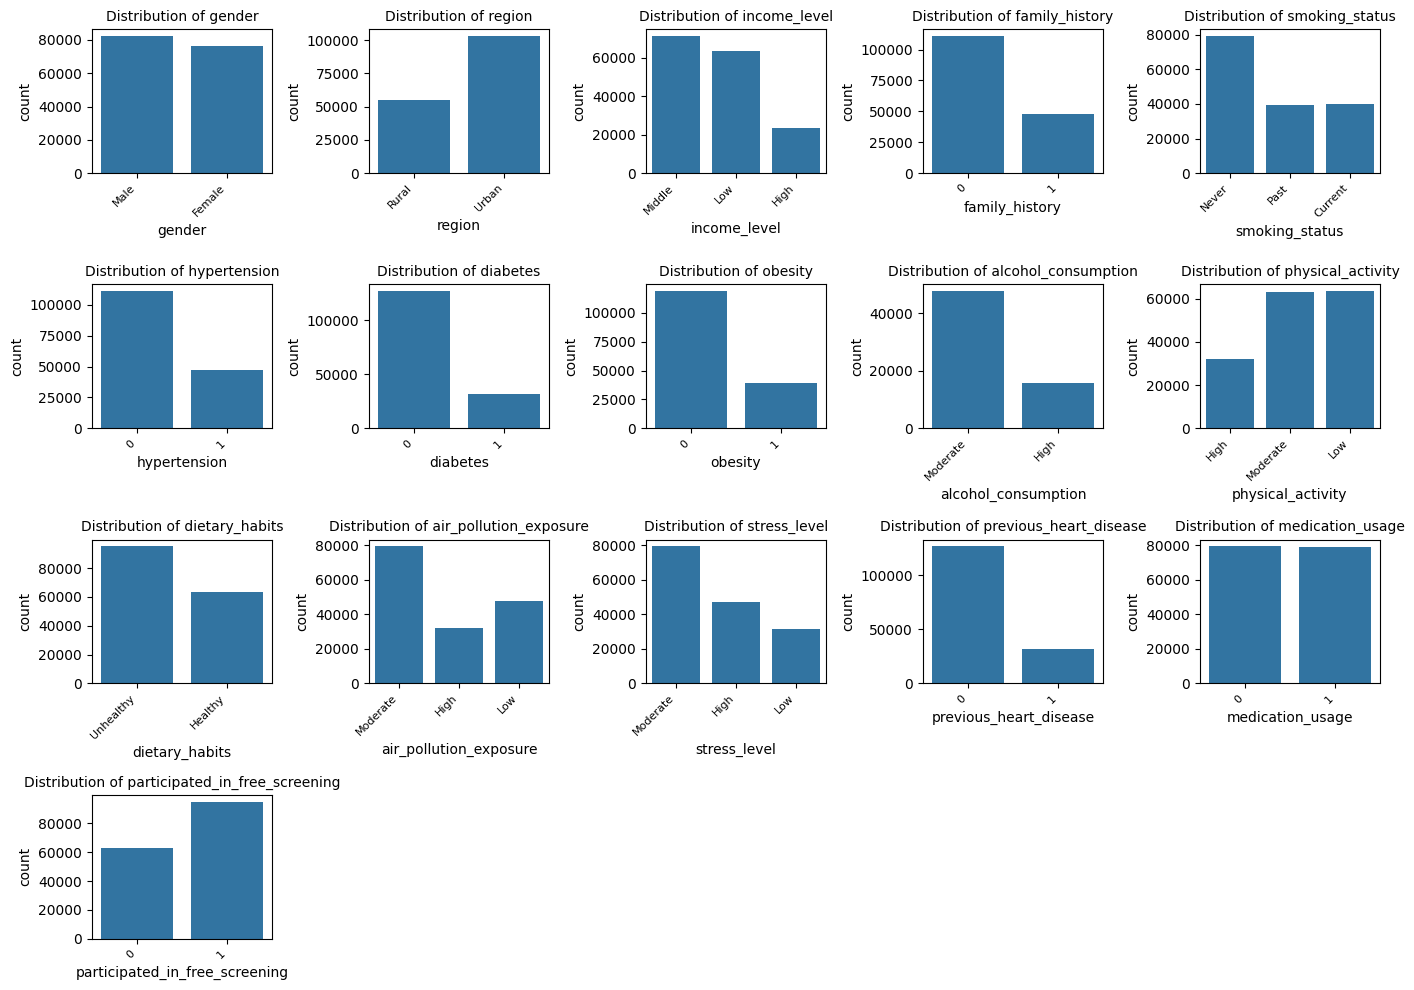

In [9]:
# Set the size for the overall plot grid
plt.figure(figsize=(14, 10))  # Adjust the width and height for your screen

# List of categorical columns to plot
categorical_cols = ['gender', 'region', 'income_level', 'family_history',
                    'smoking_status', 'hypertension', 'diabetes', 'obesity',
                    'alcohol_consumption', 'physical_activity', 'dietary_habits',
                    'air_pollution_exposure', 'stress_level',
                    'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']

# Creating subplots (adjust the grid size to fit all plots)
n_cols = 5  # Number of columns in the plot grid
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)  # Calculate number of rows

# Loop through each categorical variable and create a plot
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Create subplot (n_rows x n_cols grid)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels for better readability

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

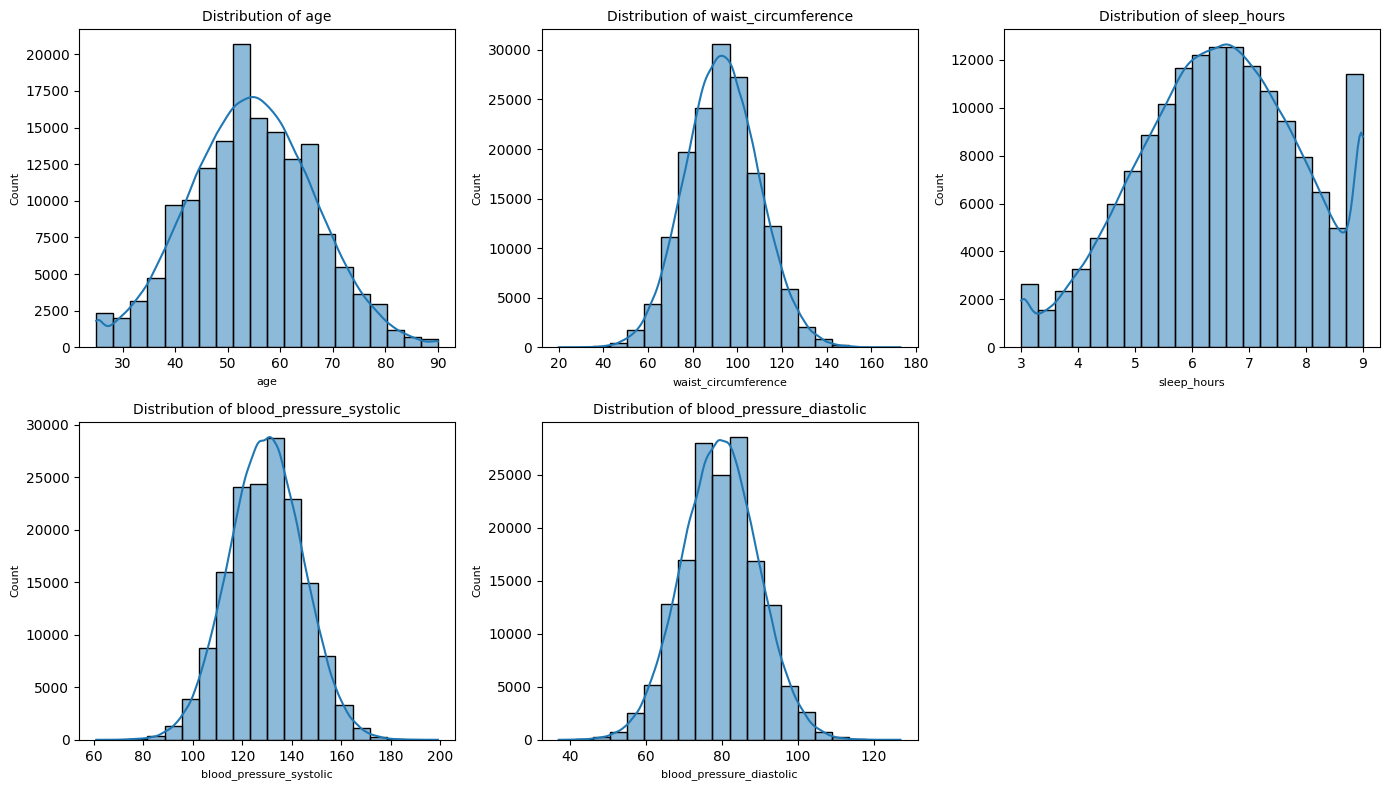

In [10]:
# List of usable numerical columns
usable_numerical_cols = ['age', 'waist_circumference', 'sleep_hours',
                         'blood_pressure_systolic', 'blood_pressure_diastolic']

# Set up the plot grid
plt.figure(figsize=(14, 8))  # You can tweak this to fit your screen
n_cols = 3
n_rows = len(usable_numerical_cols) // n_cols + (len(usable_numerical_cols) % n_cols > 0)

# Plot each numerical column
for i, col in enumerate(usable_numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,Never,NaN,High,Unhealthy,Moderate,Moderate,5.970603,113,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,Past,NaN,Moderate,Healthy,High,High,5.643813,132,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,Past,Moderate,Moderate,Healthy,Low,Low,6.336197,116,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,Never,Moderate,Moderate,Unhealthy,Low,High,7.912990,136,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,Current,Moderate,Moderate,Unhealthy,High,Moderate,3.252338,127,75,104,59,127,139,Normal,1,0,1,1


In [12]:
# Store results
chi2_results = []

# Loop through each categorical variable
for col in categorical_cols:
    # Create contingency table
    contingency = pd.crosstab(df[col], df['heart_attack'])

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency)

    # Append result
    chi2_results.append({
        'Variable': col,
        'Chi2 Statistic': round(chi2, 2),
        'p-value': round(p, 4),
        'Significant (p < 0.05)': p < 0.05
    })

# Convert to DataFrame and display
chi2_df = pd.DataFrame(chi2_results)
chi2_df.sort_values('p-value', inplace=True)
chi2_df

,Variable,Chi2 Statistic,p-value,Significant (p < 0.05)
7,obesity,4668.70,0.0000,True
6,diabetes,5990.38,0.0000,True
5,hypertension,11479.75,0.0000,True
4,smoking_status,4622.84,0.0000,True
13,previous_heart_disease,11954.63,0.0000,True
1,region,4.92,0.0266,True
10,dietary_habits,4.38,0.0364,True
14,medication_usage,3.47,0.0625,False
11,air_pollution_exposure,4.82,0.0899,False
15,participated_in_free_screening,2.10,0.1471,False


In [13]:
# Results storage
results = []

# Loop through each numerical variable
for col in usable_numerical_cols:
    group1 = df[df['heart_attack'] == 0][col]
    group2 = df[df['heart_attack'] == 1][col]

    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

    results.append({
        'Variable': col,
        'U Statistic': round(stat, 2),
        'p-value': round(p, 4),
        'Significant (p < 0.05)': p < 0.05
    })

# Display results
pd.DataFrame(results).sort_values('p-value')

,Variable,U Statistic,p-value,Significant (p < 0.05)
0,age,2.617537e+09,0.0000,True
1,waist_circumference,2.779022e+09,0.0000,True
3,blood_pressure_systolic,3.016927e+09,0.5547,False
4,blood_pressure_diastolic,3.015850e+09,0.6384,False
2,sleep_hours,3.010656e+09,0.9102,False


In [14]:
#Create age groups by binning the 'age' column into intervals of 10 years
bins = list(range(25, 100, 10))  # Age groups: 25-34, 35-44, ..., 85-94
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Create labels like '25-34', '35-44', etc.

# Bin the 'age' column into these groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [15]:
contingency_table = pd.crosstab(df['age_group'], df['heart_attack'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"p-value: {p_val}")


# Step 3: Interpret the result
if p_val < 0.05:
    print("Significant association between age group and heart attack occurrence (p < 0.05).")
else:
    print("No significant association between age group and heart attack occurrence (p >= 0.05).")

Chi-Square Test Results:
Chi2 Statistic: 2061.322429018374
p-value: 0.0
Significant association between age group and heart attack occurrence (p < 0.05).


<ipython-input-16-eabbf42590c2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart_attack_counts = df.groupby('age_group')['heart_attack'].value_counts().unstack().fillna(0)


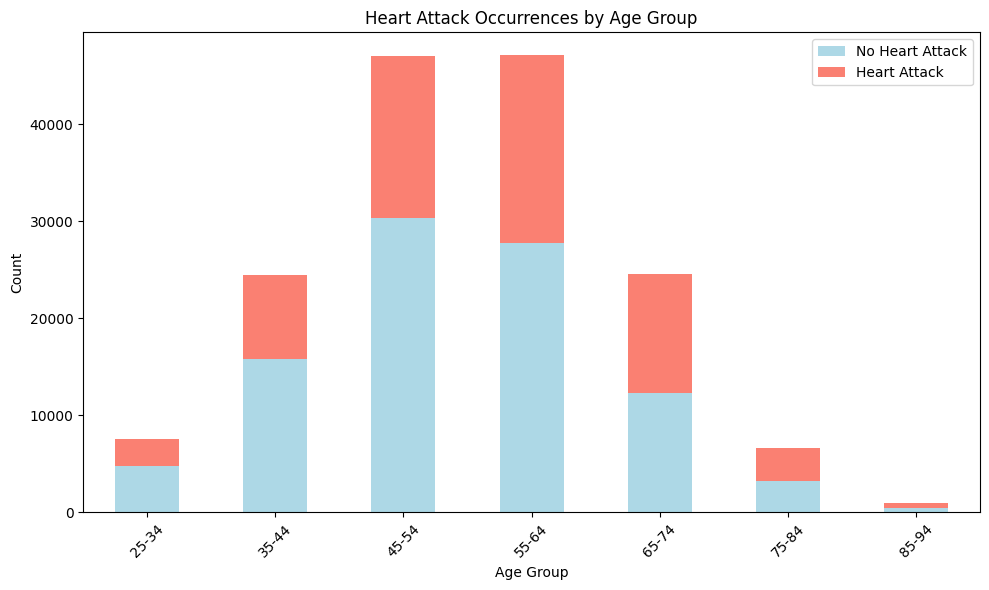

In [16]:
#Count how many individuals in each age group have had a heart attack
age_heart_attack_counts = df.groupby('age_group')['heart_attack'].value_counts().unstack().fillna(0)

# Plot the data
age_heart_attack_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Heart Attack Occurrences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Heart Attack', 'Heart Attack'])
plt.tight_layout()
plt.show()

In [17]:
def categorize_sleep(hours):
    if hours < 4:
        return 'Critical'
    elif hours < 7:
        return 'Insufficient'
    else:
        return 'Normal'

df['sleep_category'] = df['sleep_hours'].apply(categorize_sleep)

#Create contingency table with heart_attack
contingency_table = pd.crosstab(df['sleep_category'], df['heart_attack'])

#Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Step 4: Print results
print("Chi-Square Test for Sleep Categories vs Heart Attack")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Step 5: Conclusion
if p_val < 0.05:
    print("Significant association between sleep category and heart attack occurrence (p < 0.05).")
else:
    print("No significant association between sleep category and heart attack occurrence (p ≥ 0.05).")

Chi-Square Test for Sleep Categories vs Heart Attack
Chi2 Statistic: 4.1203
p-value: 0.1274
No significant association between sleep category and heart attack occurrence (p ≥ 0.05).


In [18]:
def categorize_bp(row):
    systolic = row['blood_pressure_systolic']
    diastolic = row['blood_pressure_diastolic']

    if systolic > 180 or diastolic > 120:
        return 'Hypertensive Crisis'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Hypertension Stage 1'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 120 and diastolic < 80:
        return 'Normal'
    else:
        return 'Uncategorized'  # Fallback (just in case)

#Apply it to create the new column
df['blood_pressure_category'] = df.apply(categorize_bp, axis=1)

#Create a contingency table
contingency_table = pd.crosstab(df['blood_pressure_category'], df['heart_attack'])

#Run the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

#Display results
print("Chi-Square Test for Blood Pressure Category vs Heart Attack")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_val:.4f}")

#Conclusion
if p_val < 0.05:
    print("Significant association between blood pressure category and heart attack (p < 0.05).")
else:
    print("No significant association between blood pressure category and heart attack (p ≥ 0.05).")

Chi-Square Test for Blood Pressure Category vs Heart Attack
Chi2 Statistic: 6.7676
p-value: 0.1487
No significant association between blood pressure category and heart attack (p ≥ 0.05).


In [19]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack,age_group,sleep_category,blood_pressure_category
0,60,Male,Rural,Middle,0,1,211,0,83,0,Never,NaN,High,Unhealthy,Moderate,Moderate,5.970603,113,62,173,48,121,101,Normal,0,0,0,0,55-64,Insufficient,Normal
1,53,Female,Urban,Low,0,0,208,0,106,1,Past,NaN,Moderate,Healthy,High,High,5.643813,132,76,70,58,83,138,Normal,1,0,1,0,45-54,Insufficient,Hypertension Stage 1
2,62,Female,Urban,Low,0,0,231,1,112,1,Past,Moderate,Moderate,Healthy,Low,Low,6.336197,116,74,118,69,130,171,Abnormal,0,1,0,1,55-64,Insufficient,Normal
3,73,Male,Urban,Low,1,0,202,0,82,1,Never,Moderate,Moderate,Unhealthy,Low,High,7.912990,136,65,98,52,85,146,Normal,0,1,1,0,65-74,Normal,Hypertension Stage 1
4,52,Male,Urban,Middle,1,0,232,0,89,0,Current,Moderate,Moderate,Unhealthy,High,Moderate,3.252338,127,75,104,59,127,139,Normal,1,0,1,1,45-54,Critical,Elevated


In [20]:
test1 = ['age','gender','region','income_level',
        'hypertension','diabetes','obesity','waist_circumference',
        'family_history','smoking_status','alcohol_consumption','physical_activity',
        'air_pollution_exposure','stress_level','sleep_hours',
        'blood_pressure_systolic','blood_pressure_diastolic','previous_heart_disease'
        ,'medication_usage','participated_in_free_screening',
        'age_group','sleep_category','blood_pressure_category',
                     ]

test1_target = ['heart_attack']

test1_cols = test1 + test1_target

df1 = df[test1_cols].copy()

In [21]:
for col in df1.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {col}")
    print(f"Unique Values ({df1[col].nunique()}): {df1[col].unique()}")
    print("-" * 50)

Column: gender
Unique Values (2): ['Male' 'Female']
--------------------------------------------------
Column: region
Unique Values (2): ['Rural' 'Urban']
--------------------------------------------------
Column: income_level
Unique Values (3): ['Middle' 'Low' 'High']
--------------------------------------------------
Column: smoking_status
Unique Values (3): ['Never' 'Past' 'Current']
--------------------------------------------------
Column: alcohol_consumption
Unique Values (2): [nan 'Moderate' 'High']
--------------------------------------------------
Column: physical_activity
Unique Values (3): ['High' 'Moderate' 'Low']
--------------------------------------------------
Column: air_pollution_exposure
Unique Values (3): ['Moderate' 'High' 'Low']
--------------------------------------------------
Column: stress_level
Unique Values (3): ['Moderate' 'High' 'Low']
--------------------------------------------------
Column: age_group
Unique Values (7): ['55-64', '45-54', '65-74', '25-34

In [22]:
df1['alcohol_consumption'].fillna('unknown', inplace=True)

<ipython-input-22-5d4d0762548a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['alcohol_consumption'].fillna('unknown', inplace=True)


In [23]:
for col in df1.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {col}")
    print(f"Unique Values ({df1[col].nunique()}): {df1[col].unique()}")
    print("-" * 50)

Column: gender
Unique Values (2): ['Male' 'Female']
--------------------------------------------------
Column: region
Unique Values (2): ['Rural' 'Urban']
--------------------------------------------------
Column: income_level
Unique Values (3): ['Middle' 'Low' 'High']
--------------------------------------------------
Column: smoking_status
Unique Values (3): ['Never' 'Past' 'Current']
--------------------------------------------------
Column: alcohol_consumption
Unique Values (3): ['unknown' 'Moderate' 'High']
--------------------------------------------------
Column: physical_activity
Unique Values (3): ['High' 'Moderate' 'Low']
--------------------------------------------------
Column: air_pollution_exposure
Unique Values (3): ['Moderate' 'High' 'Low']
--------------------------------------------------
Column: stress_level
Unique Values (3): ['Moderate' 'High' 'Low']
--------------------------------------------------
Column: age_group
Unique Values (7): ['55-64', '45-54', '65-74', 

In [24]:
# Binary mappings
df1['gender'] = df1['gender'].map({'Male': 0, 'Female': 1})
df1['region'] = df1['region'].map({'Rural': 0, 'Urban': 1})

# Ordinal mappings
df1['income_level'] = df1['income_level'].map({'Low': 0, 'Middle': 1, 'High': 2})
df1['physical_activity'] = df1['physical_activity'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df1['air_pollution_exposure'] = df1['air_pollution_exposure'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df1['stress_level'] = df1['stress_level'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df1['age_group'] = df1['age_group'].map({
    '25-34': 0, '35-44': 1, '45-54': 2,
    '55-64': 3, '65-74': 4, '75-84': 5, '85-94': 6
})
df1['sleep_category'] = df1['sleep_category'].map({'Critical': 0, 'Insufficient': 1, 'Normal': 2})
df1['blood_pressure_category'] = df1['blood_pressure_category'].map({
    'Normal': 0, 'Elevated': 1,
    'Hypertension Stage 1': 2, 'Hypertension Stage 2': 3,
    'Hypertensive Crisis': 4
})

# Clean & encode alcohol_consumption
df1['alcohol_consumption'] = df1['alcohol_consumption'].replace('unknown', 'None')
df1['alcohol_consumption'] = df1['alcohol_consumption'].map({'None': 0, 'Moderate': 1, 'High': 2})

# One-hot encode smoking_status (non-ordinal)
df1 = pd.get_dummies(df1, columns=['smoking_status'], prefix='smoke', drop_first=True)

In [25]:
df1.head()

,age,gender,region,income_level,hypertension,diabetes,obesity,waist_circumference,family_history,alcohol_consumption,physical_activity,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,previous_heart_disease,medication_usage,participated_in_free_screening,age_group,sleep_category,blood_pressure_category,heart_attack,smoke_Never,smoke_Past
0,60,0,0,1,0,1,0,83,0,0,2,1,1,5.970603,113,62,0,0,0,3,1,0,0,True,False
1,53,1,1,0,0,0,0,106,1,0,1,2,2,5.643813,132,76,1,0,1,2,1,2,0,False,True
2,62,1,1,0,0,0,1,112,1,1,1,0,0,6.336197,116,74,0,1,0,3,1,0,1,False,True
3,73,0,1,0,1,0,0,82,1,1,1,0,2,7.912990,136,65,0,1,1,4,2,2,0,True,False
4,52,0,1,1,1,0,0,89,0,1,1,2,1,3.252338,127,75,1,0,1,2,0,1,1,False,False


In [26]:
# Features and target
X1 = df1.drop('heart_attack', axis=1)
y1 = df1['heart_attack']

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)

In [27]:
smote = SMOTE(random_state=42)
X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

In [28]:
print("Before SMOTE:\n", y1_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y1_train_resampled).value_counts())

Before SMOTE:
 heart_attack
0    75883
1    50801
Name: count, dtype: int64

After SMOTE:
 heart_attack
0    75883
1    75883
Name: count, dtype: int64


In [31]:
rf_model_1 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=7, random_state=42)

In [32]:
rf_model_1.fit(X1_train_resampled, y1_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [33]:
y1_pred = rf_model_1.predict(X1_test)

print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))

print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

print("\nAccuracy Score:", accuracy_score(y1_test, y1_pred))

Confusion Matrix:
[[13584  5387]
 [ 4197  8503]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     18971
           1       0.61      0.67      0.64     12700

    accuracy                           0.70     31671
   macro avg       0.69      0.69      0.69     31671
weighted avg       0.70      0.70      0.70     31671


Accuracy Score: 0.6973887783776956


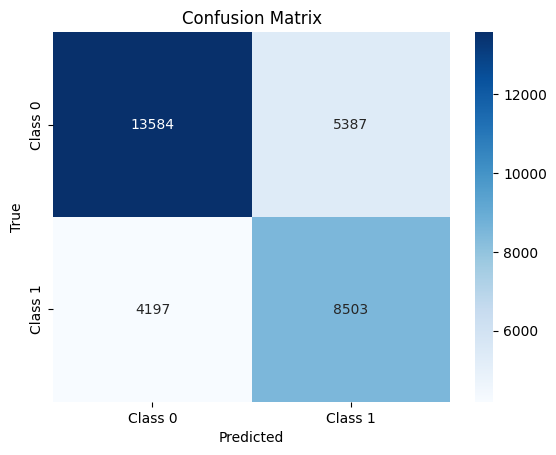

In [34]:
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

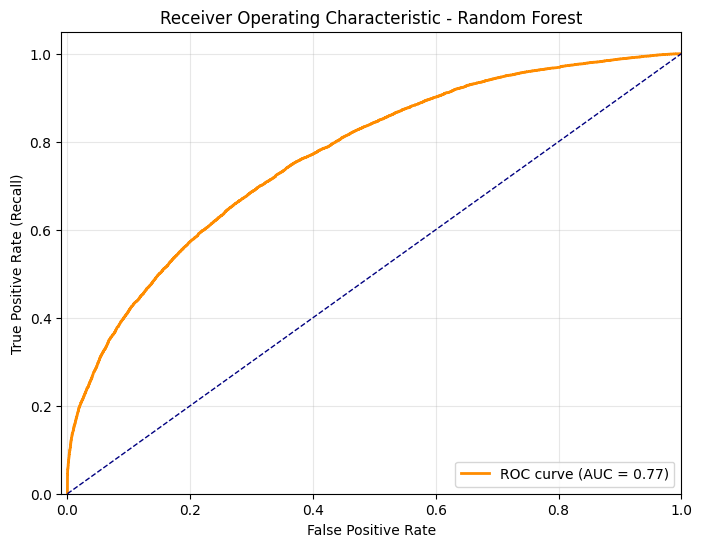

In [35]:
y_proba_1 = rf_model_1.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_proba_1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

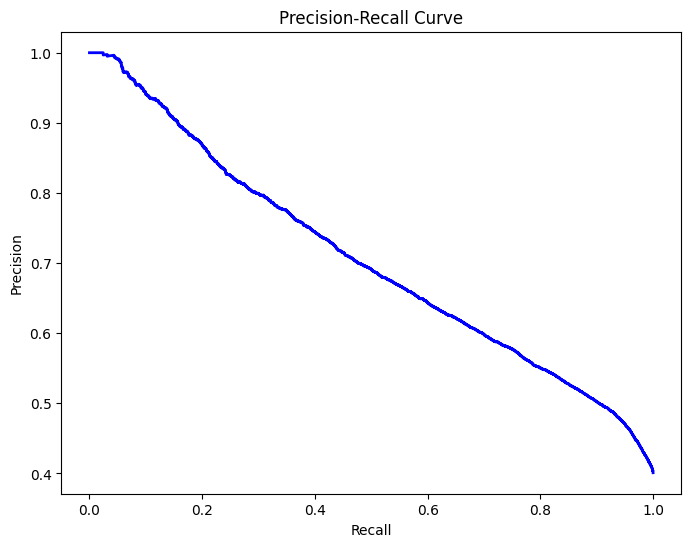

In [36]:
precision, recall, thresholds = precision_recall_curve(y1_test, y_proba_1)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

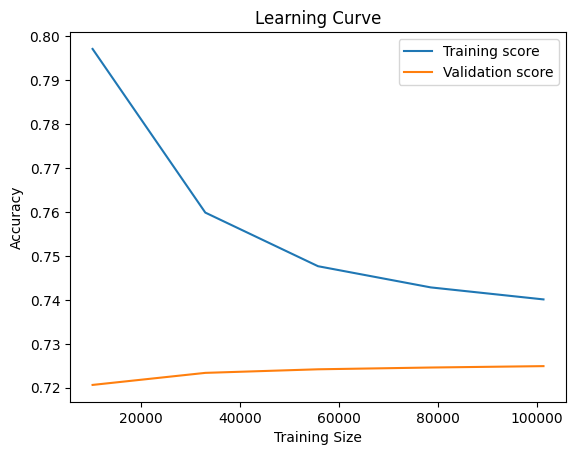

In [37]:
train_sizes, train_scores, valid_scores = learning_curve(rf_model_1, X1_train, y1_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

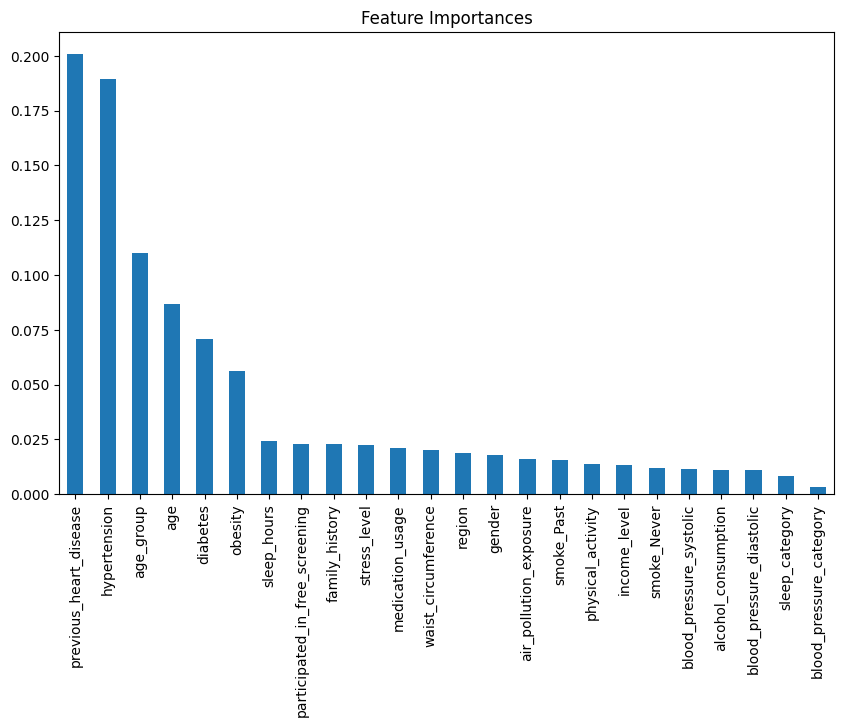

In [38]:
feature_importances = pd.Series(rf_model_1.feature_importances_, index=X1_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Hyperparameter Tuning

In [39]:
rf_model_2 = RandomForestClassifier(random_state=42)

In [43]:
param_dist = {
    'n_estimators': [200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [44]:
random_search_1 = RandomizedSearchCV(
    estimator=rf_model_2,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [45]:
random_search_1.fit(X1_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [46]:
best_rf_1 = random_search_1.best_estimator_

In [47]:
print(best_rf_1)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)


In [55]:
rf_model_2_2 = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [56]:
rf_model_2_2.fit(X1_train_resampled, y1_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [59]:
y2_pred = rf_model_2_2.predict(X1_test)

print("Confusion Matrix:")
print(confusion_matrix(y1_test, y2_pred))

print("\nClassification Report:")
print(classification_report(y1_test, y2_pred))

print("\nAccuracy Score:", accuracy_score(y1_test, y2_pred))

Confusion Matrix:
[[13612  5359]
 [ 4223  8477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     18971
           1       0.61      0.67      0.64     12700

    accuracy                           0.70     31671
   macro avg       0.69      0.69      0.69     31671
weighted avg       0.70      0.70      0.70     31671


Accuracy Score: 0.6974519276309558


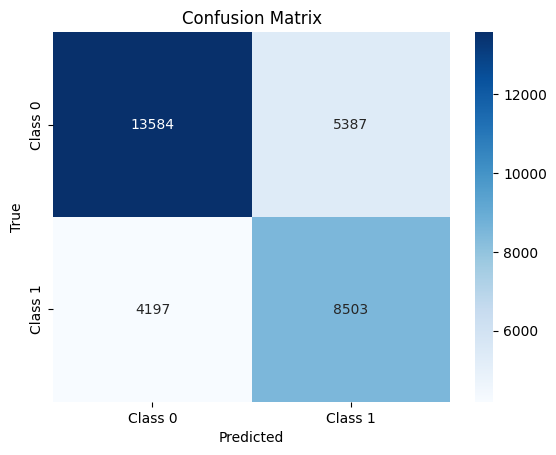

In [60]:
cm2 = confusion_matrix(y1_test, y2_pred)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

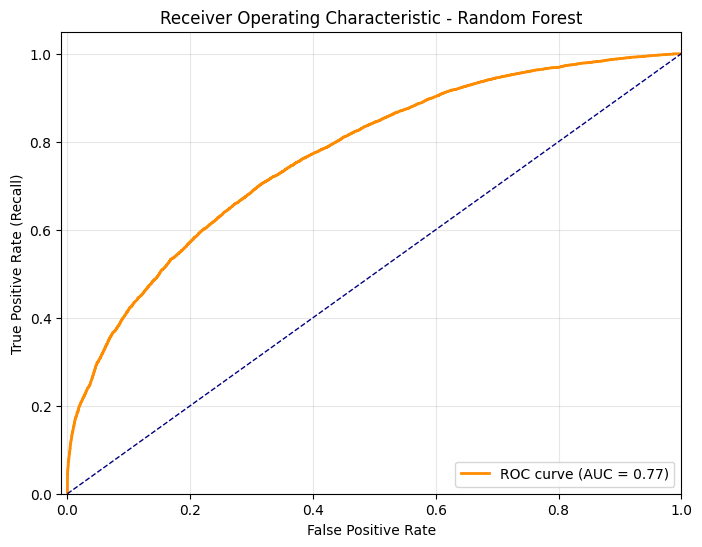

In [61]:
y_proba_2 = rf_model_2_2.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_proba_2)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

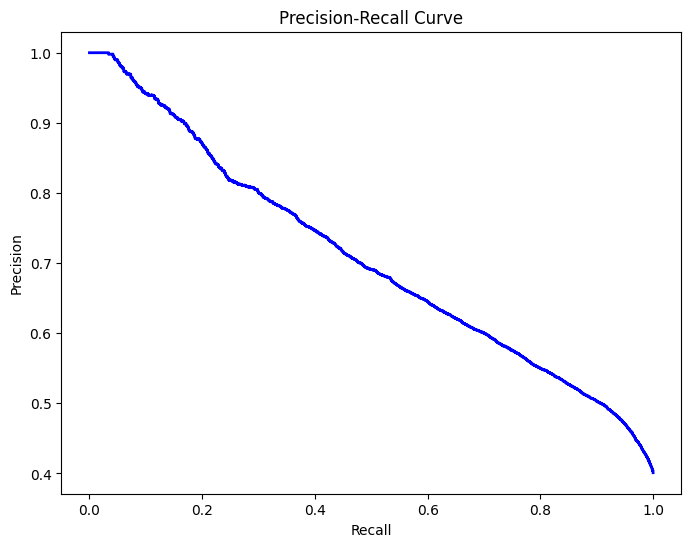

In [62]:
precision, recall, thresholds = precision_recall_curve(y1_test, y_proba_2)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

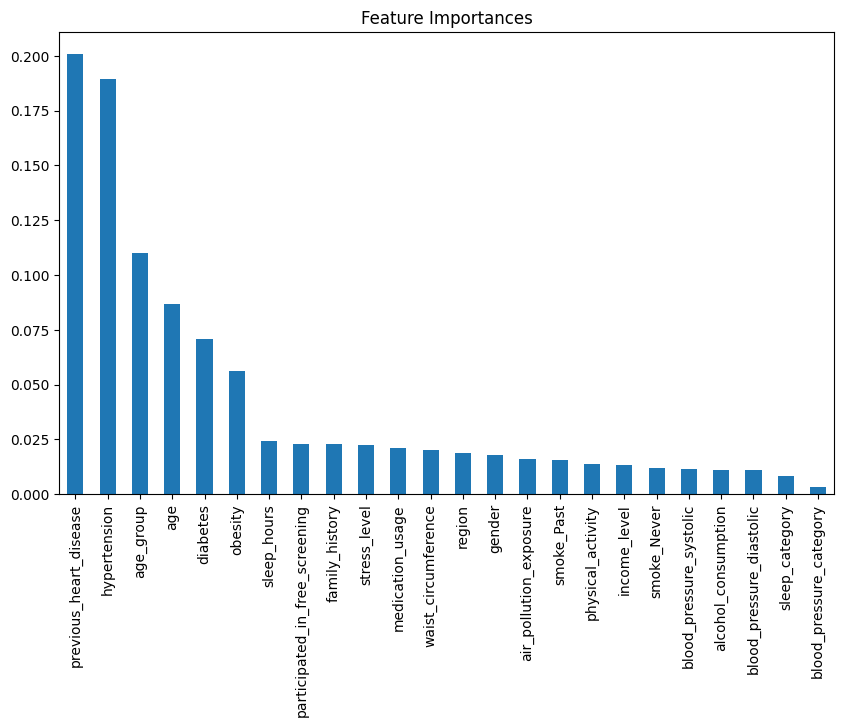

In [63]:
feature_importances_2 = pd.Series(rf_model_2_2.feature_importances_, index=X1_train.columns)
feature_importances_2 = feature_importances_2.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

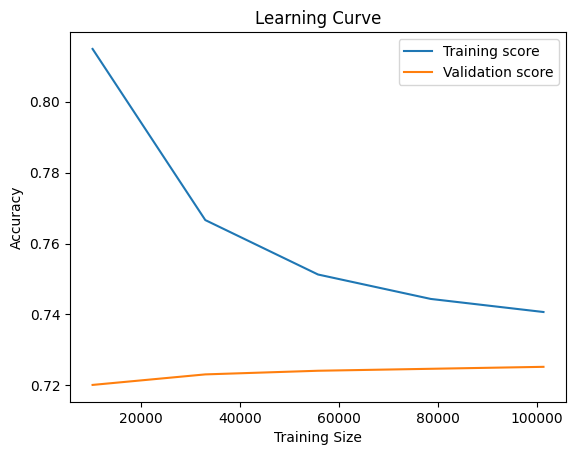

In [64]:
train_sizes, train_scores, valid_scores = learning_curve(rf_model_2_2, X1_train, y1_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

---

MODEL 2

---

In [65]:
df1.head()

,age,gender,region,income_level,hypertension,diabetes,obesity,waist_circumference,family_history,alcohol_consumption,physical_activity,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,previous_heart_disease,medication_usage,participated_in_free_screening,age_group,sleep_category,blood_pressure_category,heart_attack,smoke_Never,smoke_Past
0,60,0,0,1,0,1,0,83,0,0,2,1,1,5.970603,113,62,0,0,0,3,1,0,0,True,False
1,53,1,1,0,0,0,0,106,1,0,1,2,2,5.643813,132,76,1,0,1,2,1,2,0,False,True
2,62,1,1,0,0,0,1,112,1,1,1,0,0,6.336197,116,74,0,1,0,3,1,0,1,False,True
3,73,0,1,0,1,0,0,82,1,1,1,0,2,7.912990,136,65,0,1,1,4,2,2,0,True,False
4,52,0,1,1,1,0,0,89,0,1,1,2,1,3.252338,127,75,1,0,1,2,0,1,1,False,False


In [73]:
test2 = ['previous_heart_disease', 'hypertension', 'age_group',
         'age', 'diabetes', 'obesity', 'smoking_status',
         'region', 'dietary_habits', 'waist_circumference']
target_col = ['heart_attack']

# Create final list of columns to keep
test2_cols = test2 + target_col

# Drop all others
df2 = df[test2_cols].copy()

In [74]:
df2.head()

,previous_heart_disease,hypertension,age_group,age,diabetes,obesity,smoking_status,region,dietary_habits,waist_circumference,heart_attack
0,0,0,55-64,60,1,0,Never,Rural,Unhealthy,83,0
1,1,0,45-54,53,0,0,Past,Urban,Healthy,106,0
2,0,0,55-64,62,0,1,Past,Urban,Healthy,112,1
3,0,1,65-74,73,0,0,Never,Urban,Unhealthy,82,0
4,1,1,45-54,52,0,0,Current,Urban,Unhealthy,89,1


In [75]:
# Binary mappings
df2['region'] = df2['region'].map({'Rural': 0, 'Urban': 1})

# Ordinal mappings
df2['age_group'] = df2['age_group'].map({
    '25-34': 0, '35-44': 1, '45-54': 2,
    '55-64': 3, '65-74': 4, '75-84': 5, '85-94': 6
})

# One-hot encode smoking_status (non-ordinal)
df2 = pd.get_dummies(df2, columns=['smoking_status'], prefix='smoke', drop_first=True)

In [77]:
df2['dietary_habits'] = df2['dietary_habits'].map({'Unhealthy': 0, 'Healthy': 1})

In [78]:
df2.head()

,previous_heart_disease,hypertension,age_group,age,diabetes,obesity,region,dietary_habits,waist_circumference,heart_attack,smoke_Never,smoke_Past
0,0,0,3,60,1,0,0,0,83,0,True,False
1,1,0,2,53,0,0,1,1,106,0,False,True
2,0,0,3,62,0,1,1,1,112,1,False,True
3,0,1,4,73,0,0,1,0,82,0,True,False
4,1,1,2,52,0,0,1,0,89,1,False,False


In [79]:
# Features and target
X2 = df2.drop('heart_attack', axis=1)
y2 = df2['heart_attack']

# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

In [80]:
smote = SMOTE(random_state=42)
X2_train_resampled, y2_train_resampled = smote.fit_resample(X2_train, y2_train)

In [82]:
print("Before SMOTE:\n", y2_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y2_train_resampled).value_counts())

Before SMOTE:
 heart_attack
0    75883
1    50801
Name: count, dtype: int64

After SMOTE:
 heart_attack
0    75883
1    75883
Name: count, dtype: int64


In [100]:
rf_model_3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42)

In [101]:
rf_model_3.fit(X2_train_resampled, y2_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [104]:
y_pred_new = rf_model_3.predict(X2_test)

print("Confusion Matrix:")
print(confusion_matrix(y2_test, y_pred_new))

print("\nClassification Report:")
print(classification_report(y2_test, y_pred_new))

print("\nAccuracy Score:", accuracy_score(y2_test, y_pred_new))

Confusion Matrix:
[[12849  6122]
 [ 3295  9405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73     18971
           1       0.61      0.74      0.67     12700

    accuracy                           0.70     31671
   macro avg       0.70      0.71      0.70     31671
weighted avg       0.72      0.70      0.71     31671


Accuracy Score: 0.7026617410249124


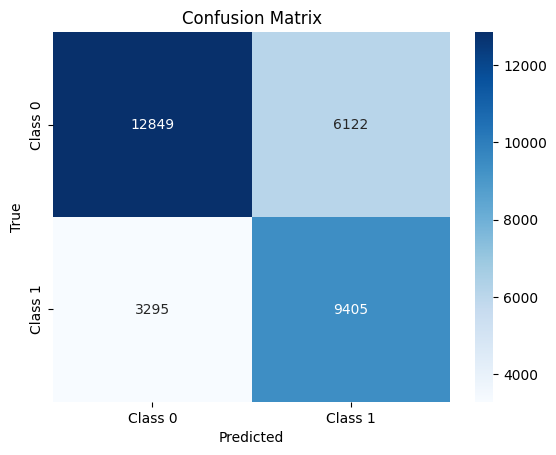

In [105]:
cm3 = confusion_matrix(y2_test, y_pred_new)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

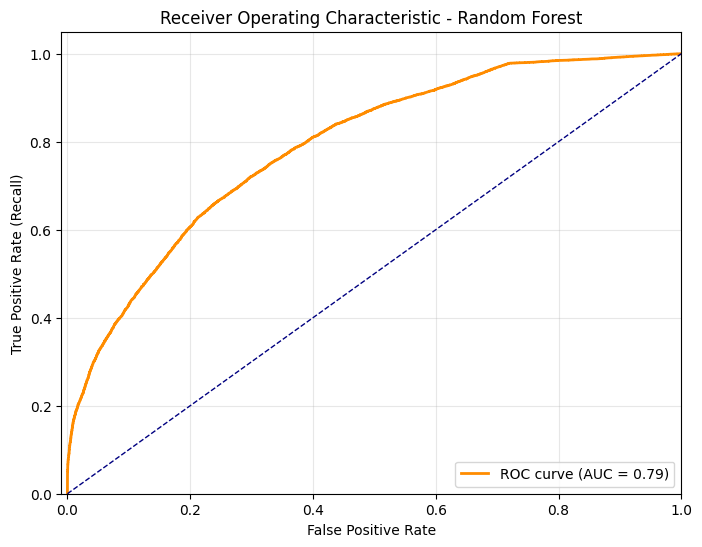

In [106]:
y_proba_new = rf_model_3.predict_proba(X2_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y_proba_new)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

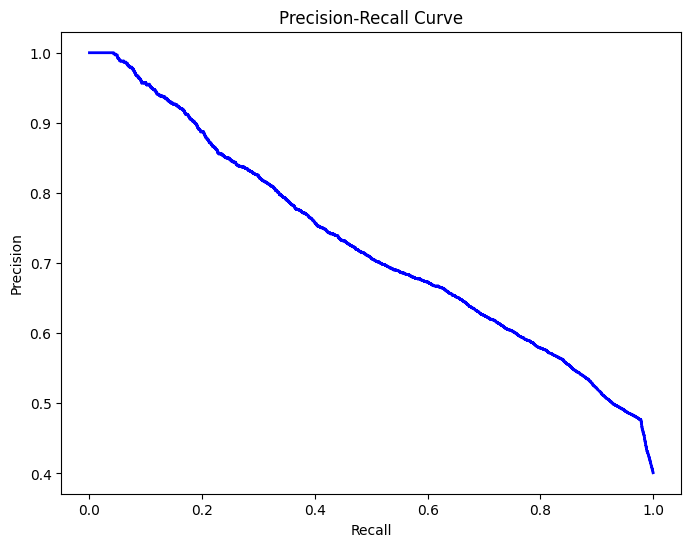

In [107]:
precision, recall, thresholds = precision_recall_curve(y2_test, y_proba_new)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [108]:
cv_scores = cross_val_score(rf_model_3, X2_train_resampled, y2_train_resampled, cv=5, scoring='accuracy')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Mean Cross-Validation Accuracy: 0.6886718817471728


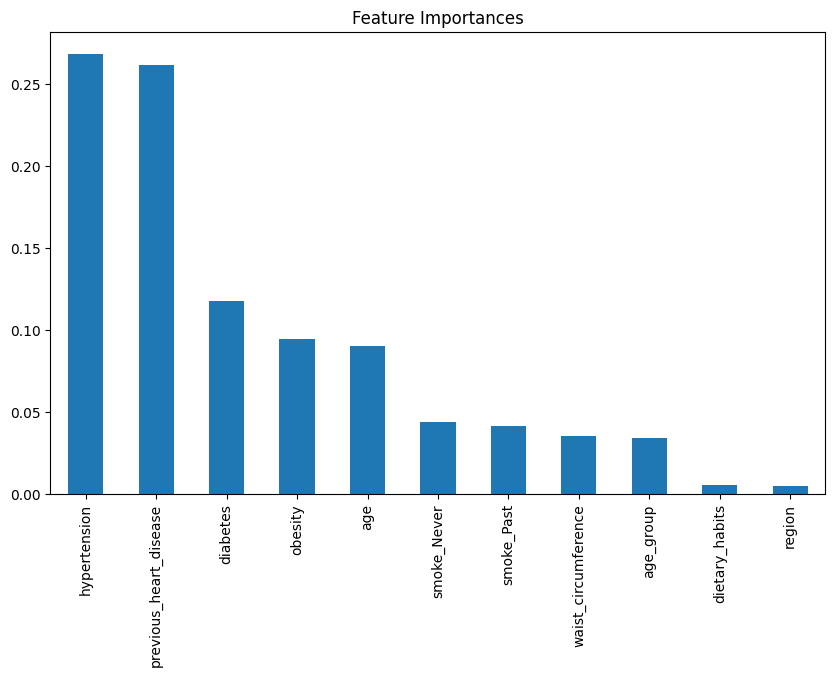

In [109]:
feature_importances_new = pd.Series(rf_model_3.feature_importances_, index=X2_train_resampled.columns)
feature_importances_new = feature_importances_new.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
feature_importances_new.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Training Size | Train Score | Valid Score | Gap
-----------------------------------------------
12141         0.7942       0.6402       0.1540
39458         0.7528       0.6593       0.0935
66776         0.7437       0.6640       0.0797
94094         0.7403       0.6649       0.0755
121412        0.7001       0.6888       0.0113


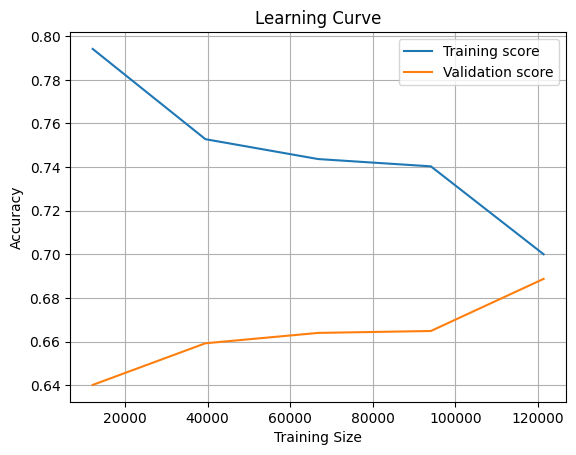

In [103]:
# Run learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    rf_model_3,
    X2_train_resampled,
    y2_train_resampled,
    cv=5,
    scoring='accuracy'
)

# Calculate mean scores and gap
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
gap = np.abs(train_scores_mean - valid_scores_mean)

# Print training size and corresponding gap
print("Training Size | Train Score | Valid Score | Gap")
print("-----------------------------------------------")
for size, tr, val, g in zip(train_sizes, train_scores_mean, valid_scores_mean, gap):
    print(f"{size:<13} {tr:.4f}       {val:.4f}       {g:.4f}")

# Plot
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, valid_scores_mean, label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


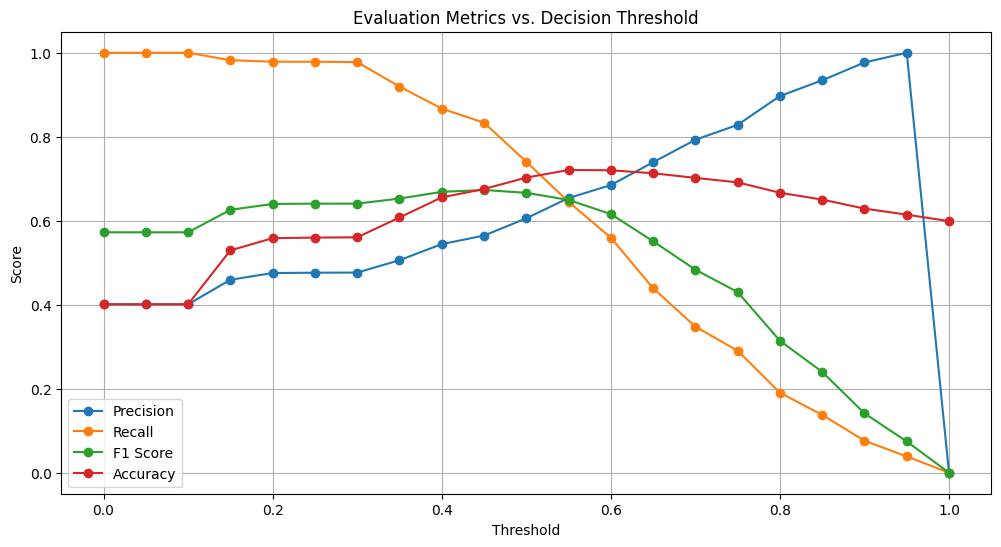

In [110]:
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize metric lists
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba_new >= thresh).astype(int)
    precision_scores.append(precision_score(y2_test, y_pred_thresh))
    recall_scores.append(recall_score(y2_test, y_pred_thresh))
    f1_scores.append(f1_score(y2_test, y_pred_thresh))
    accuracy_scores.append(accuracy_score(y2_test, y_pred_thresh))

# Plot the metrics vs thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()